<a href="https://colab.research.google.com/github/arvindcsekar/GW-PTA-PINN/blob/main/RK4_Analytic_GW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

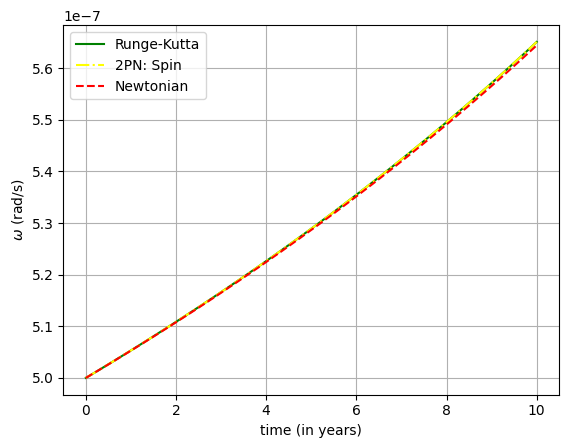

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as ac

G = 6.6743e-11 #big G constant
c = 3e8 #light
m = 1e9*1.989e30
m_chirp = (m**2)**(3/5) / ((2 * m)**(1/5))  # chirp mass
m_c = m_chirp
m_total = 2*m #total mass
nu = 1 #stated
eta = 0.25 #assuming both SMBHs of identical mass (1e9 solar masses)
chi = 0.5 #high spin SMBH assumed (equal, aligned spin)
Q_15 = 19/3*chi*eta -113/12*chi +4*np.pi #aligned spin case, 3rd term (delta) vanishes
omg_a = 5e-7 #from Kepler relation
omg_positive = 5e-7
yr = (365.25)*(24)*(60)*(60)
GMsun = ac.GM_sun.value
dsun = GMsun/(c**2)
tsun = GMsun/(c**3)
pc = ac.pc.value

def f(t, omg):
  tN_omg = G * m_chirp * omg / c**3 #post-Newtonian relation
  tm_omg = G * m_total * omg / c**3 #post-Newtonian relation
  return ((96/5) * omg**2 * tN_omg**(5/3) * (1 + (-743/336 - (11/4)*eta) * tm_omg**(2/3) * nu + Q_15 * tm_omg * nu**(3/2) + (34103/18144 + (13661/2016)*eta + (59/18)*eta**2) * tm_omg**(4/3) * nu**2))

def rk4(f, omg_0, t_f, t_0, h):
  n_steps = int((t_f - t_0)/h + 1) #define number of steps
  t = np.linspace(t_0, t_f, n_steps)
  omg = np.zeros(n_steps) #initialises empty omg array of the size of n_steps
  omg[0] = omg_0 #omg_0 at time t initialised

  for i in range(1, n_steps):
    k1 = h * f(t[i-1], omg[i-1])  #initial slope
    k2 = h * f(t[i-1] + h/2, omg[i-1] + k1/2)  #slope at midpoint using k1
    k3 = h * f(t[i-1] + h/2, omg[i-1] + k2/2)  #slope at midpoint using k2
    k4 = h * f(t[i-1] + h, omg[i-1] + k3)      #end slope using k3

    omg[i] = omg[i-1] + (k1 + 2*k2 + 2*k3 + k4)/6  #combine weighted slopes

  return t, omg

omg_0 = 5e-7
t_0 = 0
t_f = 10 * 365.25 * 24 * 3600
h = 1000

t, omg = rk4(f, omg_0, t_f, t_0, h)
t_years = t / yr

def get_omg(t,t_0,omg_a,m_c,eta,nu,chi_A,chi_S):
    m=1e9
    tN_ = m_c*omg_a*tsun
    tm_ = m*omg_a*tsun
    tmta_ = t-t_0
    delta=0
    tau = 1-256/5*omg_a*tN_**(5/3)*tmta_
    Q15=(-113/12*chi_A*delta+19/3*chi_S*eta-113/12*chi_S+4*np.pi)
    ww=(omg_a*(((371/128*eta**2+56975/16128*eta+1855099/903168)/tau**(7/8)+(-3058673/
    1354752-617/192*eta**2-5429/1344*eta)/tau**(11/8)+(-605/192*eta**2-40865/8064*eta-\
    2760245/1354752)/tau**(13/8)+(1331/384*eta**2+89903/16128*eta+6072539/2709504)/
    tau**(19/8))*tm_**(4/3)*nu**2+(3/5/tau**(11/8)*Q15-3/5/tau**(3/4)*Q15)*tm_*nu**(3/2)+
    ((11/8*eta+743/672)/tau**(5/8)+(-11/8*eta-743/672)/tau**(11/8))*tm_**(2/3)*nu+1/
    tau**(3/8)))
    return ww

t=np.linspace(0,10,100)*yr
omg_a= 5e-7
m_c=(1e9**2)**(3/5) / (2*1e9)**(1/5)
eta=1/4
nu=1
chi_A = 0.5
chi_S = 0.5
#chi_A ranges from (-0.5,0.5)
#chi_S ranges from (0,1)

omg_arr=get_omg(t,t_0,omg_a,m_c,eta,nu,chi_A,chi_S)
omg_arr_Q=get_omg(t,t_0,omg_a,m_c,eta,nu,chi_A,chi_S)

plt.plot(t/yr,omg_arr, linestyle="-", color="green")
plt.plot(t/yr,omg_arr_Q, linestyle="-.", color="yellow")
plt.plot(t_years, omg, linestyle="--", color="red")
plt.grid(True)
plt.legend(["Runge-Kutta", "2PN: Spin","Newtonian"])
plt.xlabel("time (in years)")
plt.ylabel(r"$\omega$ (rad/s)")
plt.show()


/tmp/ipython-input-2129171216.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


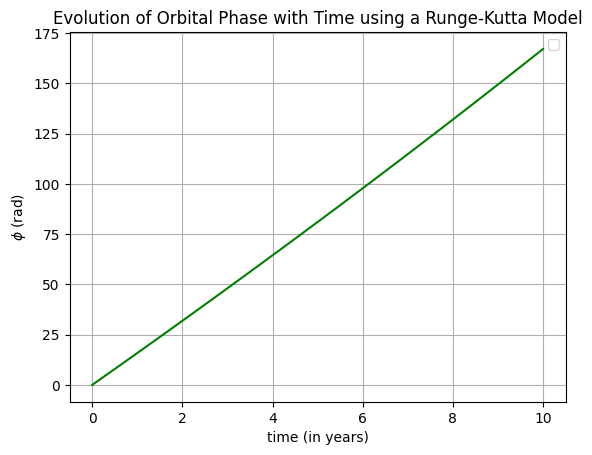

In [ ]:
def rk4_phi(f, omg, phi_0, t_f, t_0, h):
  n_steps2 = int((t_f - t_0)/h + 1) #define number of steps
  t = np.linspace(t_0, t_f, n_steps2)
  phi = np.zeros(n_steps2) #initialises empty phi array of the size of n_steps2
  phi[0] = phi_0 #phi_0 at time t initialised

  t_omg = np.linspace(t_0, t_f, len(omg))

  def omega_of_tau(tau):
      return np.interp(tau, t_omg, omg)

  for w in range(0, n_steps2-1):
    h_local = t[w+1] - t[w]
    ti = t[w]

    k1 = omega_of_tau(ti)
    k2 = omega_of_tau(ti + 0.5*h_local)
    k3 = omega_of_tau(ti + 0.5*h_local)
    k4 = omega_of_tau(ti + h_local)

    phi[w+1] = phi[w] + (h_local/6.0)*(k1 + 2*k2 + 2*k3 + k4)

  return t, phi

omg_0 = 5e-7
t_0 = 0
t_f = 10 * 365.25 * 24 * 3600
h = 1000
phi_0 = 0

t, phi = rk4_phi(f, omg, phi_0, t_f, t_0, h)
t_years = t / yr

plt.plot(t_years, phi, color="green")
plt.grid(True)
plt.title("Evolution of Orbital Phase with Time using a Runge-Kutta Model")
plt.legend()
plt.xlabel("time (in years)")
plt.ylabel(r"$\phi$ (rad)")
plt.show()

In [ ]:
print(phi[-1])

167.19866559598995
